## ML MIPT Practical 3

В данном домашнем задании вы будете решать задачу классификации отзывов.

Шаги решения:

1. Извлечение признаков: напишите код для создания TF-IDF матрицы из представленного корпуса отзывов
2. Обучение моделей: напишите код для обучения SVM и логистической регрессии
3. Кросс-валидация для подбора гиперпараметров: напишите код для оптимизации метрик обучения
4. Участие в контесте на kaggle.com

In [1]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

-------
#### Знакомство с данными

In [2]:
data = pd.read_csv('./data/train.csv', index_col=0, na_values='NaN')
print data.shape
print data.head()

(352278, 2)
                                          Reviews_Summary  Prediction
ID                                                                   
230872                                  Babies love these           3
344823                                       Salmon Trout           0
211754                                     disappointment           1
259421  Doesn't taste like Cinnabon; tastes like Waffl...           2
253418  Delicious San Daniele prosciutto and good cust...           3


In [3]:
documents = data.Reviews_Summary.values
score = data.Prediction.values

In [13]:
set(score)

{0, 1, 2, 3}

Как видите, каждый объект представляет собой отзыв о продукте и оценку по шкале от 0 до 3. Выдвинем гипотезу, что слова, используемые в написании отзыва коррелируют с оценкой, которая была поставлена. Поставим задачу - предсказать оценку, по тексту отзыва.

-----
### 1. Извлечение признаков - 10 Баллов
 

1. Для решения задачи классификации необходимо преобразовать каждый отзыв (документ) в вектор. Размерность данного вектора будет равна количеству слов используемых в корпусе (все документы). Каждая координата соответствует слову, значение в координает равно количеству раз, слово используется в документе. 

Для решения данной задачи вам необходимо написать код, который преобразовывает матрицу документов в численную матрицу.

Дополнительная информация для решения задачи:

- Подробнее про векторное представление документов: http://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction
- Используйте данный трансформер: http://scikit-learn.org/stable/modules/feature_extraction.html#common-vectorizer-usage
- Подробнее про разреженные матрицы: http://docs.scipy.org/doc/scipy-0.14.0/reference/sparse.html
- Hashing trick: https://en.wikipedia.org/wiki/Feature_hashing

Используйте n_features = 3000

In [4]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features = 3000)

X = vectorizer.fit_transform(documents)

In [5]:
X.shape

(352278, 3000)

In [6]:
y = np.array(score)

In [7]:
vectorizer.get_feature_names()[:100]

[u'00',
 u'10',
 u'100',
 u'11',
 u'12',
 u'13',
 u'14',
 u'15',
 u'16',
 u'17',
 u'18',
 u'19',
 u'1st',
 u'20',
 u'2011',
 u'2012',
 u'24',
 u'25',
 u'2nd',
 u'30',
 u'32',
 u'36',
 u'3rd',
 u'40',
 u'48',
 u'50',
 u'60',
 u'70',
 u'75',
 u'80',
 u'90',
 u'99',
 u'able',
 u'about',
 u'above',
 u'absolute',
 u'absolutely',
 u'acai',
 u'acceptable',
 u'acid',
 u'acidic',
 u'acquired',
 u'action',
 u'active',
 u'actual',
 u'actually',
 u'add',
 u'added',
 u'addict',
 u'addicted',
 u'addicting',
 u'addiction',
 u'addictive',
 u'adding',
 u'addition',
 u'additive',
 u'additives',
 u'adds',
 u'adult',
 u'adults',
 u'advertised',
 u'advertising',
 u'aerogarden',
 u'affordable',
 u'african',
 u'after',
 u'afternoon',
 u'aftertaste',
 u'again',
 u'agave',
 u'ages',
 u'aggressive',
 u'ago',
 u'agree',
 u'ah',
 u'ahmad',
 u'ahoy',
 u'aid',
 u'ain',
 u'air',
 u'al',
 u'alcohol',
 u'ale',
 u'alert',
 u'alive',
 u'all',
 u'allergen',
 u'allergic',
 u'allergies',
 u'allergy',
 u'almond',
 u'almonds

Для учета важности редких, но показательных слов (термов), используется схема взвешивания TF-IDF. Напишите код, принимающий на вход разреженную матрицу векторного представления документов и возвращающий разреженную матрицу документов, частоты термов которых взвешенны по TF-IDF.

Дополнительная информация для решения задачи:

- Подробнее про TF-IDF: https://en.wikipedia.org/wiki/Tf%E2%80%93idf
- Используйте трансформер: http://scikit-learn.org/stable/modules/feature_extraction.html#tfidf-term-weighting

In [8]:
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer()
tfidf = transformer.fit_transform(X)

Преобразуем csc матрицу в numpy array

In [9]:
X = np.array(tfidf.toarray())

------

### 2. Код для SVM и логистической регреcсии - 40 Баллов

После того, как вы получили матрицу признаков, вам необходимо реализовать алгоритм обучения SVM и логистической регрессии. Обе модели являются линейными и отличаются функциями потерь. Для решения оптимизационных задач в обеих моделей будет использоваться стохастический градиентный спуск.

Дополнительная информация для решения задачи:

- Линейные модели: http://cs231n.github.io/linear-classify/
- SGD: http://cs231n.github.io/optimization-1

Начнем с SVM стартовый код находится в файле cs231n/classifiers/linear_svm.py вашей задачей является реализация подсчета функции потерь для SVM

Разбейте обучающую выборку на 2 части train и test

Дополнительная информация для решения задачи:
- Используйте трансформер: http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html#sklearn.cross_validation.train_test_split

In [10]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Транспонируем матрицы с данными, т.к. так будет проще реализовать код SVM

In [11]:
X_train = X_train.T
X_test = X_test.T

Возьмем подвыборки из обучающей выборки, для быстрой проверки кода.

In [12]:
X_train_sample = X_train[:, 0:100000]
y_train_sample = y_train[0:100000]

Найдем чему равен градиент:

In [13]:
from cs231n.classifiers.linear_svm import svm_loss_naive
import time

# generate a random SVM weight matrix of small numbers
W = np.random.randn(4, X_train_sample.shape[0]) * 0.01 
loss, grad = svm_loss_naive(W, X_train_sample, y_train_sample, 0.00001)
print 'loss: %f' % (loss, )

loss: 0.016006


Градиент равен 0, т.к. код который должен его считать отсутствует. Реализуйте наивную версию и проверьте результат с помощью численного метода расчета. Градиенты должны почти совпадать.

In [14]:
from cs231n.classifiers.linear_svm import svm_loss_naive

# Once you've implemented the gradient, recompute it with the code below
# and gradient check it with the function we provided for you

# Compute the loss and its gradient at W.
loss, grad = svm_loss_naive(W, X_train_sample, y_train_sample, 0.00001)

# Numerically compute the gradient along several randomly chosen dimensions, and
# compare them with your analytically computed gradient. The numbers should match
# almost exactly along all dimensions.
from cs231n.gradient_check import grad_check_sparse
f = lambda w: svm_loss_naive(w, X_train_sample, y_train_sample, 0.00001)[0]
grad_numerical = grad_check_sparse(f, W, grad, 5)

numerical: -0.000009 analytic: -0.000009, relative error: 4.104429e-09
numerical: 0.000084 analytic: 0.000084, relative error: 2.824678e-10
numerical: 0.000107 analytic: 0.000107, relative error: 1.552663e-09
numerical: 0.000160 analytic: 0.000160, relative error: 4.530592e-10
numerical: -0.001015 analytic: -0.001015, relative error: 1.879437e-13


In [16]:
from cs231n.classifiers.linear_svm import svm_loss_vectorized


# Once you've implemented the gradient, recompute it with the code below
# and gradient check it with the function we provided for you

# Compute the loss and its gradient at W.
loss, grad = svm_loss_vectorized(W, X_train_sample, y_train_sample, 0.0)

# Numerically compute the gradient along several randomly chosen dimensions, and
# compare them with your analytically computed gradient. The numbers should match
# almost exactly along all dimensions.
from cs231n.gradient_check import grad_check_sparse
f = lambda w: svm_loss_vectorized(w, X_train_sample, y_train_sample, 0.0)[0]
grad_numerical = grad_check_sparse(f, W, grad, 5)

numerical: 0.000001 analytic: 0.000001, relative error: 1.456780e-07
numerical: 0.000020 analytic: 0.000020, relative error: 2.805338e-09
numerical: -0.000404 analytic: -0.000404, relative error: 1.485454e-10
numerical: 0.000011 analytic: 0.000011, relative error: 9.940694e-09
numerical: 0.000002 analytic: 0.000002, relative error: 1.314232e-09


Теперь реализуйте векторизованную версию расчета фунции потерь - svm_loss_vectorized

Завершите реализацию SVM, реализуйте векторизированную версию расчета градиента.

In [196]:
tic = time.time()
_, grad_naive = svm_loss_naive(W, X_train_sample, y_train_sample, 0.00001)
toc = time.time()
print 'Naive loss and gradient: computed in %fs' % (toc - tic)

tic = time.time()
_, grad_vectorized = svm_loss_vectorized(W, X_train_sample, y_train_sample, 0.00001)
toc = time.time()
print 'Vectorized loss and gradient: computed in %fs' % (toc - tic)

# The loss is a single number, so it is easy to compare the values computed
# by the two implementations. The gradient on the other hand is a matrix, so
# we use the Frobenius norm to compare them.
difference = np.linalg.norm(grad_naive - grad_vectorized, ord='fro')
print 'difference: %f' % difference

Naive loss and gradient: computed in 6.519071s
Vectorized loss and gradient: computed in 11.919058s
difference: 0.000000


### Stochastic Gradient Descent

In [19]:
# Now implement SGD in LinearSVM.train() function and run it with the code below
import time

from cs231n.classifiers import LinearSVM
svm = LinearSVM()
tic = time.time()
loss_hist = svm.train(X_train, y_train, learning_rate=5e-2, reg=0.01,
                      num_iters=500, verbose=True, batch_size=20000)

toc = time.time()
print 'That took %fs' % (toc - tic)
print 'Current loss is %f' % loss_hist[-1]

iteration 0 / 500: loss 0.001751
iteration 100 / 500: loss 0.000277
iteration 200 / 500: loss 0.000151
iteration 300 / 500: loss 0.000167
iteration 400 / 500: loss 0.000103
That took 953.103875s
Current loss is 0.000070


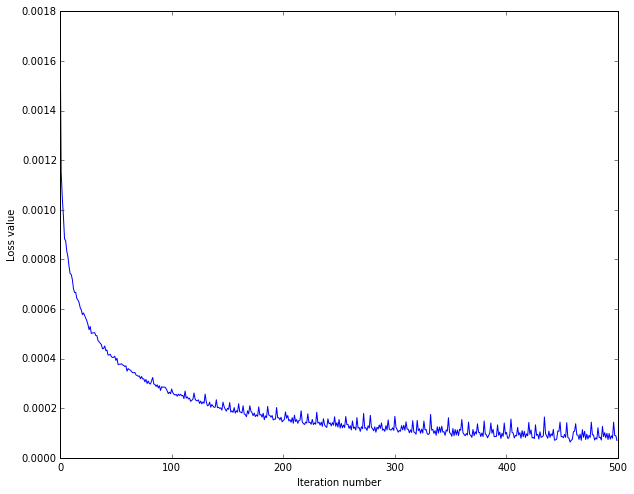

In [20]:
# A useful debugging strategy is to plot the loss as a function of
# iteration number:
plt.plot(loss_hist)
plt.xlabel('Iteration number')
plt.ylabel('Loss value')

In [21]:
# Write the LinearSVM.predict function 
y_train_pred = svm.predict(X_train)
y_test_pred = svm.predict(X_test)

In [22]:
#and evaluate the performance on both the test set
from sklearn.metrics import classification_report

In [23]:
print classification_report(y_test, y_test_pred)

             precision    recall  f1-score   support

          0       0.54      0.41      0.47     11476
          1       0.33      0.34      0.33      6605
          2       0.44      0.08      0.13     17838
          3       0.78      0.94      0.85     80333

avg / total       0.68      0.72      0.67    116252



In [176]:
# compare result with the most common dummy classifier
print classification_report(y_test, [3]*len(y_test))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00     11476
          1       0.00      0.00      0.00      6605
          2       0.00      0.00      0.00     17838
          3       0.69      1.00      0.82     80333

avg / total       0.48      0.69      0.56    116252



/usr/local/lib/python2.7/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


--------

## Softmax Classifier

In [17]:
# First implement the naive softmax loss function with nested loops.
# Open the file cs231n/classifiers/softmax.py and implement the
# softmax_loss_naive function.

from cs231n.classifiers.softmax import softmax_loss_naive
import time

# Generate a random softmax weight matrix and use it to compute the loss.
W = np.random.randn(4, X_train_sample.shape[0]) * 0.01 
loss, grad = softmax_loss_naive(W, X_train_sample, y_train_sample, 0.0)

# As a rough sanity check, our loss should be something close to -log(0.1).
print 'loss: %f' % loss
print 'sanity check: %f' % (-np.log(0.1))

loss: 1.384707
sanity check: 2.302585


In [53]:
# Complete the implementation of softmax_loss_naive and implement a (naive)
# version of the gradient that uses nested loops.
loss, grad = softmax_loss_naive(W, X_train_sample, y_train_sample, 0.0)

# As we did for the SVM, use numeric gradient checking as a debugging tool.
# The numeric gradient should be close to the analytic gradient.
from cs231n.gradient_check import grad_check_sparse
f = lambda w: softmax_loss_naive(w, X_train_sample, y_train_sample, 0.0)[0]
grad_numerical = grad_check_sparse(f, W, grad, 5)

numerical: -0.000021 analytic: -0.000021, relative error: 1.363645e-07


KeyboardInterrupt: 

In [ ]:
# Now that we have a naive implementation of the softmax loss function and its gradient,
# implement a vectorized version in softmax_loss_vectorized.
# The two versions should compute the same results, but the vectorized version should be
# much faster.
tic = time.time()
loss_naive, grad_naive = softmax_loss_naive(W, X_train_sample, y_train_sample, 0.00001)
toc = time.time()
print 'naive loss: %e computed in %fs' % (loss_naive, toc - tic)

from cs231n.classifiers.softmax import softmax_loss_vectorized
tic = time.time()
loss_vectorized, grad_vectorized = softmax_loss_vectorized(W, X_train_sample, y_train_sample, 0.00001)
toc = time.time()
print 'vectorized loss: %e computed in %fs' % (loss_vectorized, toc - tic)

# As we did for the SVM, we use the Frobenius norm to compare the two versions
# of the gradient.
grad_difference = np.linalg.norm(grad_naive - grad_vectorized, ord='fro')
print 'Loss difference: %f' % np.abs(loss_naive - loss_vectorized)
print 'Gradient difference: %f' % grad_difference

In [68]:
from cs231n.classifiers.softmax import softmax_loss_vectorized

tic = time.time()
loss_vectorized, grad_vectorized = softmax_loss_vectorized(W, X_train_sample, y_train_sample, 0.00001)
toc = time.time()
print 'vectorized loss: %e computed in %fs' % (loss_vectorized, toc - tic)
print grad_vectorized

vectorized loss: 1.384719e+00 computed in 45.947708s
[[ -1.48725601e-05   3.89730551e-05   7.94852942e-05 ...,   1.29288468e-05
    7.19229342e-05   5.17372569e-05]
 [  1.47807153e-05   8.87965012e-05   1.09103415e-04 ...,   1.79366212e-05
    5.83993658e-05   5.21490699e-05]
 [  1.00579012e-05   5.97559466e-05   2.91527156e-05 ...,   8.26868885e-06
    5.74353751e-05   4.70583684e-05]
 [ -1.11719341e-06  -1.78676640e-04  -2.08892562e-04 ...,  -3.02852939e-05
   -1.78908812e-04  -1.42095832e-04]]


In [40]:
l = np.array(range(25)).reshape(5,5)

In [167]:
from cs231n.classifiers import Softmax
sm = Softmax()
tic = time.time()
loss_hist = sm.train(X_train, y_train, learning_rate=5e-2, reg=0.01,
                      num_iters=500, verbose=True, batch_size=20000)

toc = time.time()
print 'That took %fs' % (toc - tic)
print 'Current loss is %f' % loss_hist[-1]

iteration 0 / 500: loss 1.386299
iteration 100 / 500: loss 1.363543
iteration 200 / 500: loss 1.343818
iteration 300 / 500: loss 1.325619
iteration 400 / 500: loss 1.309761
That took 273.411873s
Current loss is 1.296077


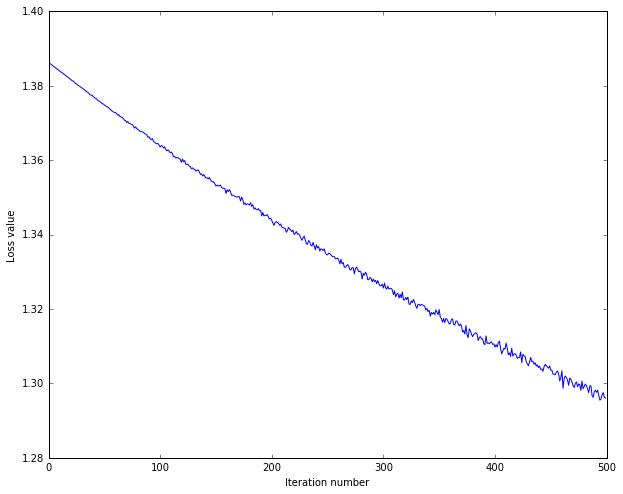

In [168]:
# A useful debugging strategy is to plot the loss as a function of
# iteration number:
plt.plot(loss_hist)
plt.xlabel('Iteration number')
plt.ylabel('Loss value')

In [170]:
# Write the LinearSVM.predict function 
y_train_pred = sm.predict(X_train)
y_test_pred = sm.predict(X_test)

In [171]:
print classification_report(y_test, y_test_pred)

             precision    recall  f1-score   support

          0       0.52      0.20      0.29     15609
          1       0.13      0.03      0.05      8811
          2       0.25      0.02      0.04     24281
          3       0.71      0.97      0.82    109036

avg / total       0.59      0.69      0.60    157737



In [172]:
# compare result with the most common dummy classifier
print classification_report(y_test, [3]*len(y_test))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00     15609
          1       0.00      0.00      0.00      8811
          2       0.00      0.00      0.00     24281
          3       0.69      1.00      0.82    109036

avg / total       0.48      0.69      0.57    157737



------

### 3. Kaggle In Class - 50 Баллов

Используйте полученные модели для решения контеста. Выберете одну из моделей, реализуйте настройку гиперпараметров и пайплайн для предсказания классов тестовой выборки для сабмита в систему.

------

### 4. Бонусы - 30 Баллов

Улучшите результат: 

- Нормализуйте слова в документах, используйте стоп слова, попробуйте различные стратегии нормализации в TF-IDF
- Используйте PCA, Word2Vec для расширения пространства фичей
- Придумайте другие стратегии и улучшайте свой результат